### Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


2024-07-26 18:54:10.472343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/martin/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-07-26 18:54:10.472384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Loading Model

In [3]:
model = tf.keras.models.load_model("trained_model.keras")

2024-07-26 18:54:19.335113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/martin/.local/lib/python3.10/site-packages/cv2/../../lib64:
2024-07-26 18:54:19.335193: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-26 18:54:19.335255: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin): /proc/driver/nvidia/version does not exist
2024-07-26 18:54:19.336362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                    

### Visualising and Performing Prediction on Single image

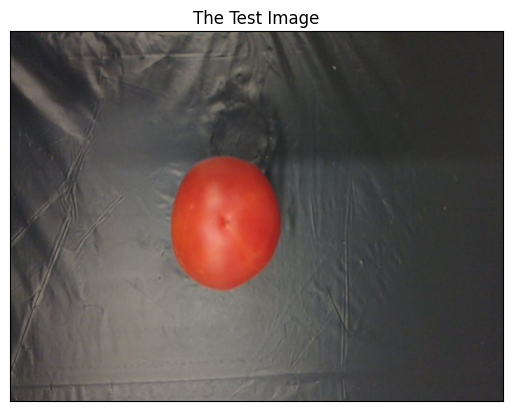

In [5]:
#Test Image Visualization
import cv2
image_path = '/home/martin/Recess/Group5/test/healthy (11).jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('The Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [7]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 219ms/step


(array([[1.8778197e-05, 9.9998116e-01, 1.4375569e-09]], dtype=float32), (1, 3))

In [8]:
result_index = np.argmax(prediction) #Return index of max element
print(result_index)

1


In [9]:
class_name = ['Reject', 'Ripe', 'Unripe']

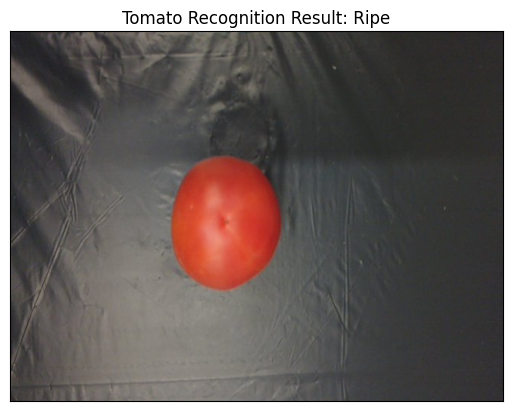

In [10]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Tomato Recognition Result: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()